In [60]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from utils import *
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform
from observision_models import NormalObservation

# Simulate ball throwing and generate Observations

In [61]:
from ball_throwing_simulator import BallThrowingSimulator

(61, 4, 1) (61, 2, 1)


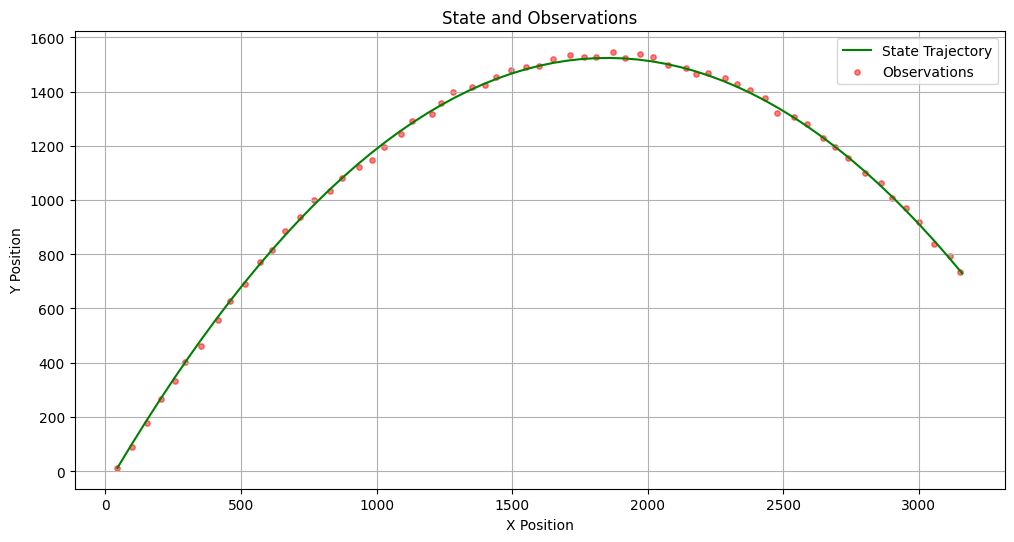

In [62]:
ball_num = 1
# init_state = np.array([[0, 0], [50,30], [100,80], [100,80]])  # Initial state: [x, y, vx, vy]
simulator = BallThrowingSimulator(delta_t=0.5, ball_num=ball_num, observation_variance=[10, 10])
# Simulate the motion and observations
states, observations = simulator.simulate(time=30)
print(states.shape, observations.shape)
# Show the simulated states and observations
fig, ax = plt.subplots(figsize=(12, 12))
plot_observations(ax, states, observations)

# Initilaize
## State
$$[X, Y, V_x, V_y]^T$$

## Uniform Random Particle Sets
$$X, Y \in [0, 3000]$$
$$V_x, V_y \in [0, 200]$$

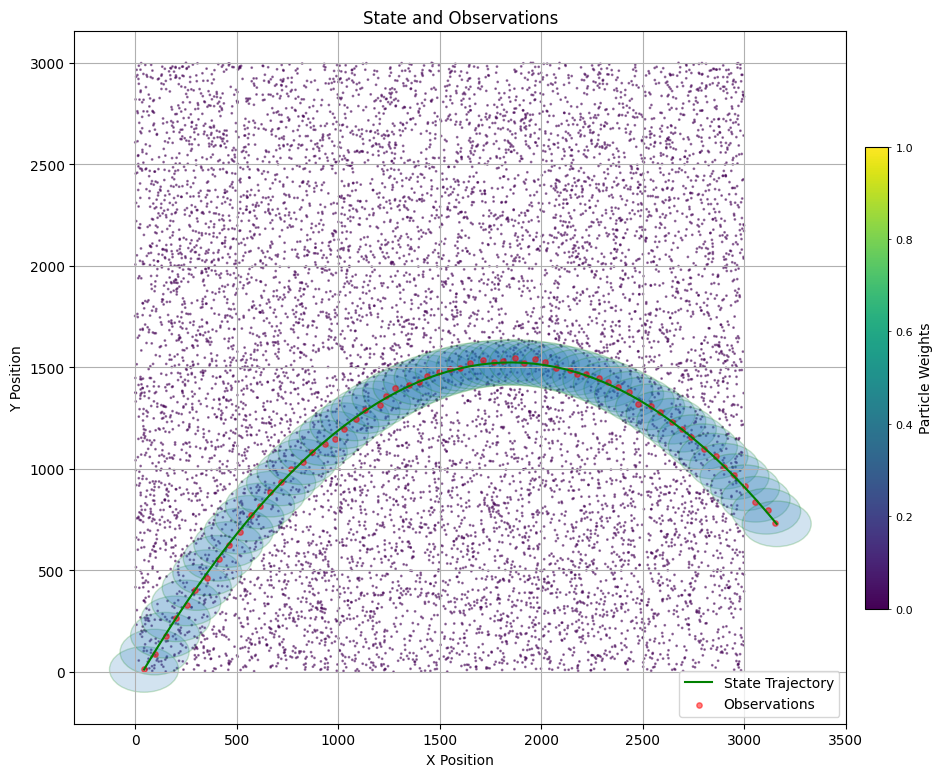

In [63]:
from partickle_filter import ParticleFilter
# initialize 1000 random particles
pf = ParticleFilter(10000)

init_particles, init_weights = pf.snaps[0]

# show initial particles
fig, ax = plt.subplots(figsize=(12, 12))
# ax.set_xlim(0, 3000)
# ax.set_ylim(0, 3000)
ax.set_title('Initial Particles')
ax.set_xlabel('X Position')
ax.set_ylabel('Y Position')
plot_particles(ax, init_particles, init_weights)
plot_observations(ax, states, observations, NormalObservation.R)
plt.show()

(10000, 4, 1)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
new weights sum: 1.0483141053714862e-15
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


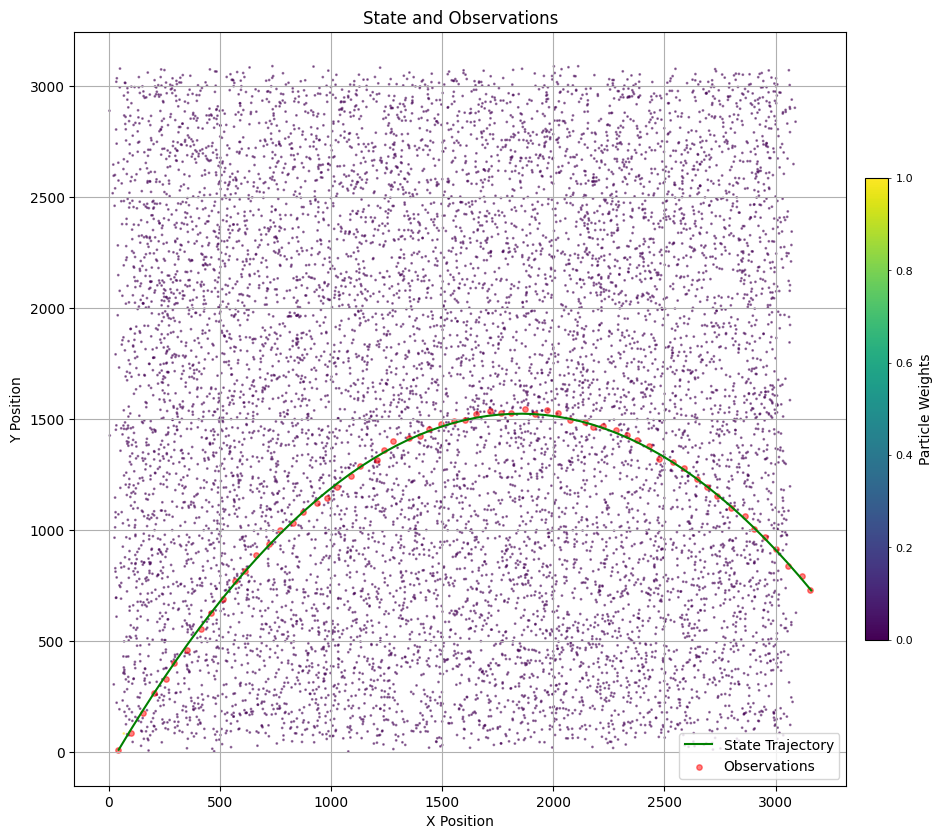

[4.28103327e-08 4.28103327e-08 4.28103327e-08 4.28103327e-08
 4.28103327e-08 4.28103327e-08 4.28103327e-08 4.28103327e-08
 4.28103327e-08 4.28103327e-08]
new weights sum: 0.0006252814810566428
[6.84656975e-05 6.84656975e-05 6.84656975e-05 6.84656975e-05
 6.84656975e-05 6.84656975e-05 6.84656975e-05 6.84656975e-05
 6.84656975e-05 6.84656975e-05]


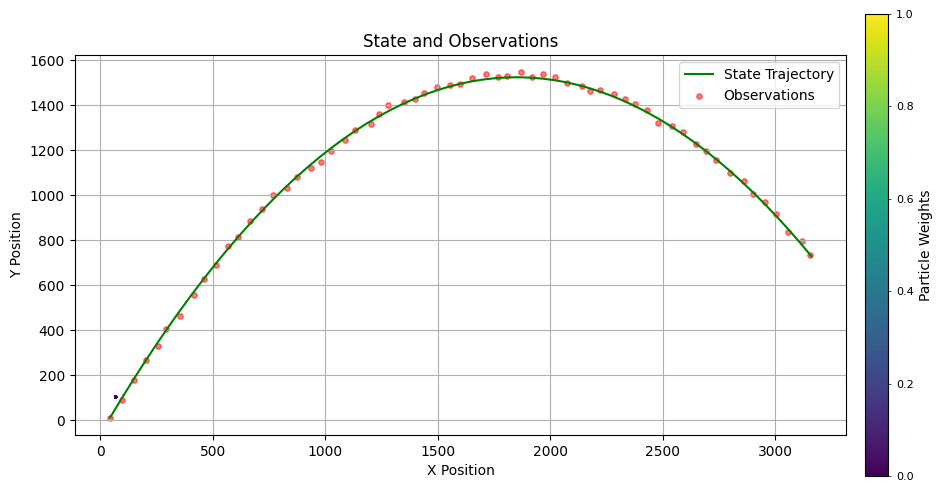

[1.33204598e-41 1.33204598e-41 1.33204598e-41 1.33204598e-41
 1.33204598e-41 1.33204598e-41 1.33204598e-41 1.33204598e-41
 1.33204598e-41 1.33204598e-41]
new weights sum: 1.2445215681374654e-06
[1.07032776e-35 1.07032776e-35 1.07032776e-35 1.07032776e-35
 1.07032776e-35 1.07032776e-35 1.07032776e-35 1.07032776e-35
 1.07032776e-35 1.07032776e-35]


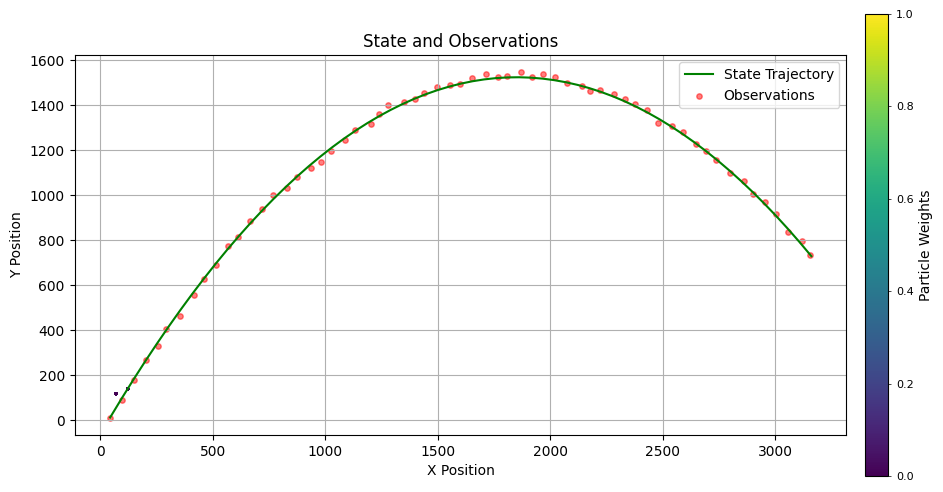

[9.789718e-39 9.789718e-39 9.789718e-39 9.789718e-39 9.789718e-39
 9.789718e-39 9.789718e-39 9.789718e-39 9.789718e-39 9.789718e-39]
new weights sum: 9.789717998638068e-35
[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]


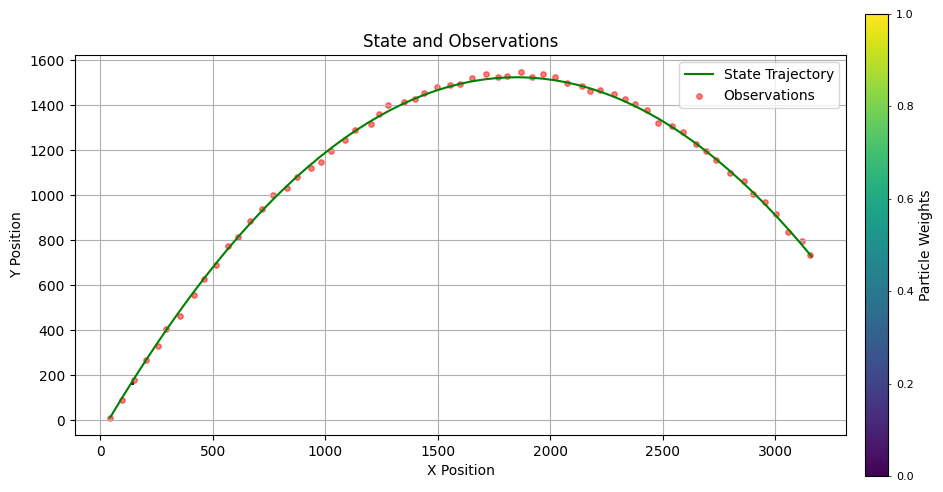

[1.2556501e-80 1.2556501e-80 1.2556501e-80 1.2556501e-80 1.2556501e-80
 1.2556501e-80 1.2556501e-80 1.2556501e-80 1.2556501e-80 1.2556501e-80]
new weights sum: 1.2556501008205617e-76
[1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04]


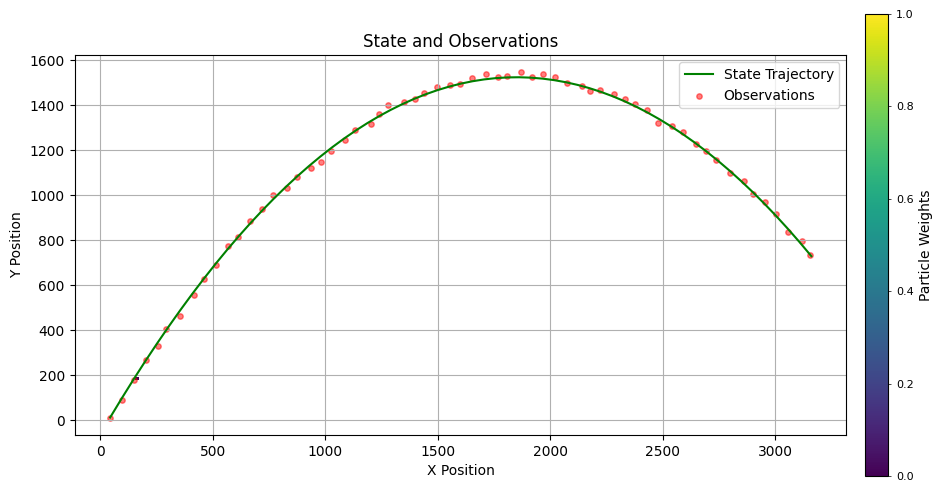

[9.08887483e-130 9.08887483e-130 9.08887483e-130 9.08887483e-130
 9.08887483e-130 9.08887483e-130 9.08887483e-130 9.08887483e-130
 9.08887483e-130 9.08887483e-130]
new weights sum: 9.088874831204909e-126
[0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001 0.0001]


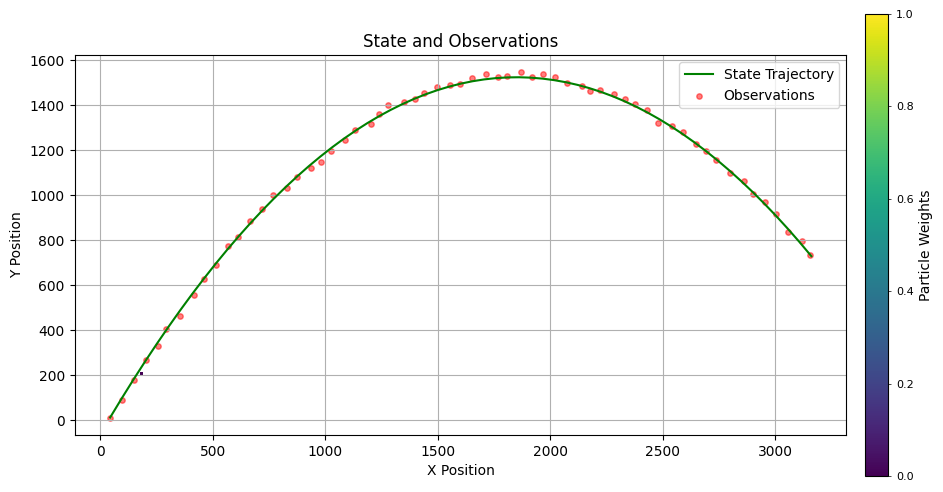

[5.55158984e-209 5.55158984e-209 5.55158984e-209 5.55158984e-209
 5.55158984e-209 5.55158984e-209 5.55158984e-209 5.55158984e-209
 5.55158984e-209 5.55158984e-209]
new weights sum: 5.5515898350520235e-205
[1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04 1.e-04]


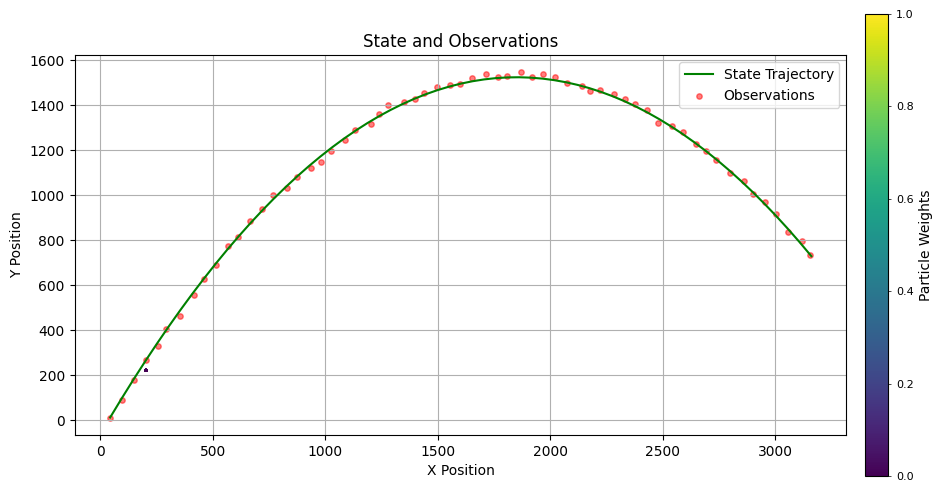

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
new weights sum: 0.0
[nan nan nan nan nan nan nan nan nan nan]


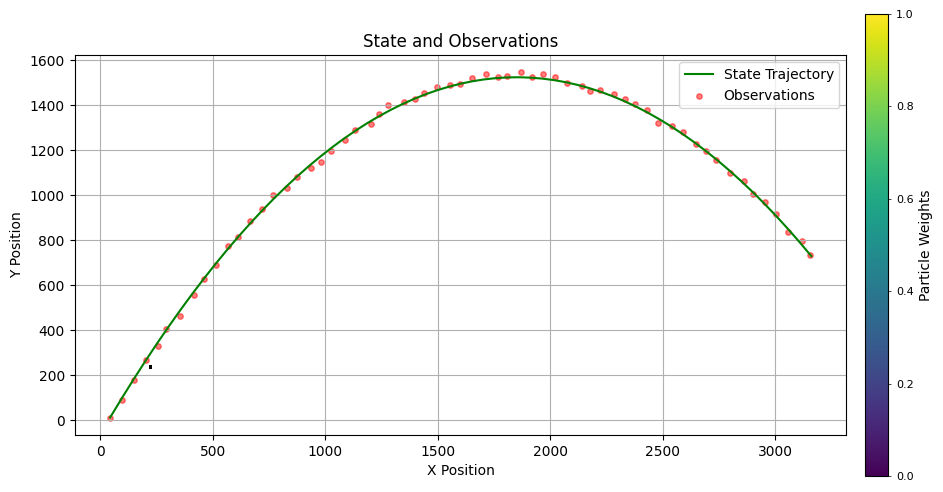

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
new weights sum: 0.0
[nan nan nan nan nan nan nan nan nan nan]


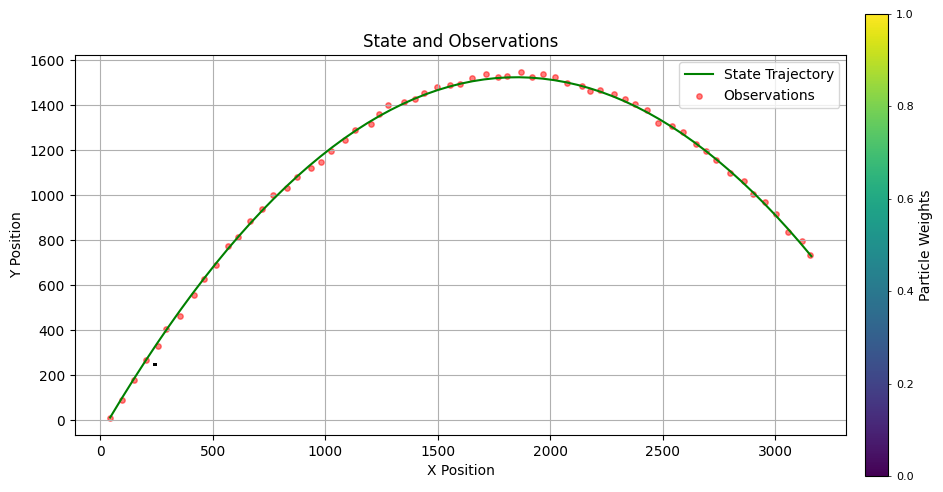

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
new weights sum: 0.0
[nan nan nan nan nan nan nan nan nan nan]


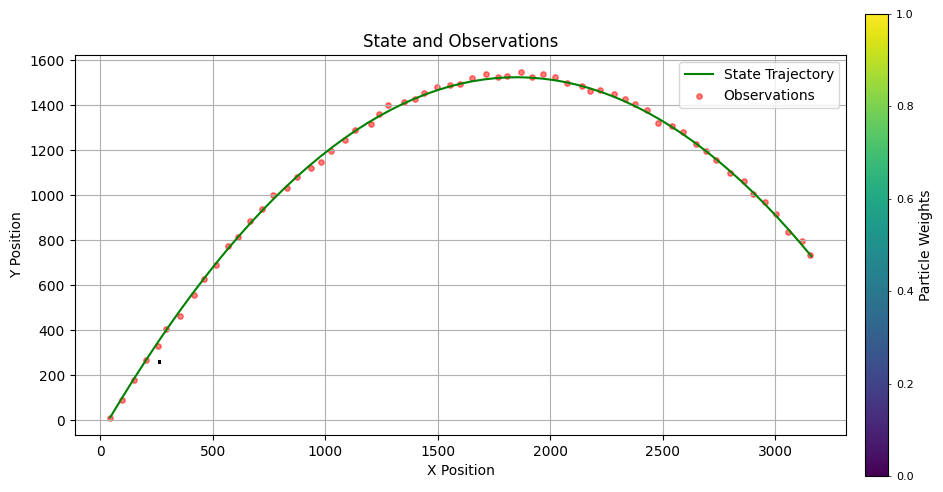

In [64]:
particles, weights = pf.particles, pf.weights
print(particles.shape)

for i in range(10):
    particles, weights = pf.update(particles, weights, observations[i,:])
    fig, ax = plt.subplots(figsize=(12, 12))
    # ax.set_xlim(0, 3000)
    # ax.set_ylim(0, 3000)
    ax.set_title('Initial Particles')
    ax.set_xlabel('X Position')
    ax.set_ylabel('Y Position')
    plot_particles(ax, particles, weights)
    plot_observations(ax, states, observations)
    plt.show()